<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/PreprocessingLoansDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset download link:
https://drive.google.com/file/d/1rIfaxVKhxCNmDaHpgr0484Gb7mIgA-nc/view?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Import Library and Read Dataset

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/loans.csv', index_col = 'client_id')
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


### Exploration of the dataset

In [ ]:
df.shape
df.columns
df.dtypes
df.info()
df.describe()
df.describe(exclude=[np.number])
df.nunique()
df['loan_type'].value_counts()
df['repaid'].value_counts()
df.isnull().sum()

#### Remove the loan_id feature

In [ ]:
df=df.drop(['loan_id'],axis=1)
df.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
client_id,,,,,,
46109,home,13672,0,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,2003-10-21,2005-07-17,1.25
46109,home,12734,1,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,2010-07-07,2012-05-21,3.13


### Convert Data Types

In [ ]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [ ]:
df['repaid'] = df['repaid'].astype('category')
df['loan_type'] = df['loan_type'].astype('category')

df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

df.dtypes

### Handling Missing Values

#### Check Null Values   =>  (NaN , None , '' , '?')

In [ ]:
df.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_start     0
loan_end       0
rate           0
dtype: int64

#### Select Features By "select_dtypes" Method

In [ ]:
df_numeric_features = df.select_dtypes(include=['number'])
print(f"Numeric Features :\n{df_numeric_features}\n")

df_catagory_features= df.select_dtypes(include=['category'])
print(f"Categorical Features :\n{df_catagory_features}\n")

df_datetime_features= df.select_dtypes(include=['datetime'])
print(f"DateTime Features :\n{df_datetime_features}\n")

df_object_features= df.select_dtypes(include=['object'])
print(f"Object Features :\n{df_object_features}\n")

#### Fill Missing Values By SimpleImputer Class

In [ ]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='mean')     # strategy= 'mean'  |  'median'  |  'most_frequent'  |  'constant', fill_value=50
df_numeric_features = pd.DataFrame(imputer1.fit_transform(df_numeric_features), columns=df_numeric_features.columns)


imputer2 = SimpleImputer(strategy='most_frequent')
df_catagory_features = pd.DataFrame(imputer2.fit_transform(df_catagory_features), columns=df_catagory_features.columns)

#### Fill Missing Values By Mode Value

In [ ]:
most_frequent_date = df_datetime_features['loan_start'].mode()[0]
df_datetime_features['loan_start']=df_datetime_features['loan_start'].fillna(most_frequent_date)

most_frequent_date = df_datetime_features['loan_end'].mode()[0]
df_datetime_features['loan_end']=df_datetime_features['loan_end'].fillna(most_frequent_date)


#### Concatenation of All Dataframes

In [ ]:
df_numeric_features.reset_index(drop=True, inplace=True)
df_catagory_features.reset_index(drop=True, inplace=True)
df_datetime_features.reset_index(drop=True, inplace=True)

df = pd.concat([df_numeric_features, df_catagory_features,df_datetime_features], axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


### Handeling Outlier values

#### Outliers Detection

##### By IQR

In [ ]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | ( upper_bound < column)]


for i, column in enumerate(df_numeric_features.columns):
    outliers = find_outliers(df_numeric_features[column])
    if(outliers.size>0):
      print(f"outliers - {column} :\n{outliers}")

outliers - rate :
41     10.49
195    10.89
421    12.62
Name: rate, dtype: float64


##### By Zscore

In [ ]:
import scipy.stats as stats

df['zscore_rate'] = stats.zscore(df['rate'])
df['zscore_loan_amount'] = stats.zscore(df['loan_amount'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,-0.445677,1.365030
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,-0.821544,0.434647
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-1.059594,1.139991
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,-0.825721,1.088170
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,-0.036399,1.455477


In [ ]:
outliers=df[(df['zscore_rate']<-3) | (3 <df['zscore_rate']) | (df['zscore_loan_amount']<-3) | (3 < df['zscore_loan_amount'])]
outliers

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,zscore_rate,zscore_loan_amount
41,2947.0,10.49,credit,1,2005-11-10,2008-03-16,3.037362,-1.208036
195,6318.0,10.89,other,0,2003-02-02,2005-05-08,3.204415,-0.399290
421,8133.0,12.62,home,1,2009-03-14,2011-03-21,3.926916,0.036152


##### Show Box Plot For Outliers

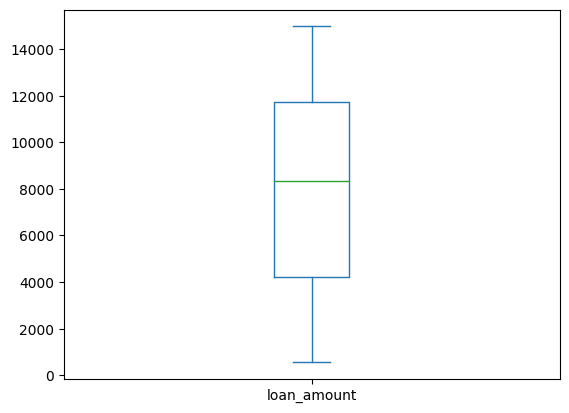

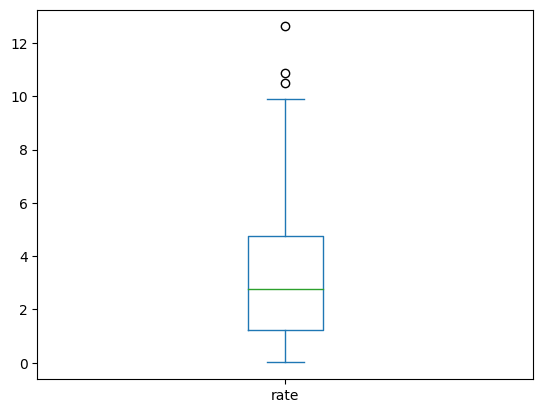

In [ ]:
df['loan_amount'].plot(kind='box')
plt.show()

df['rate'].plot(kind='box')
plt.show()

#### Drop Records Containing Outliers

In [ ]:
df=df[(-3< df['zscore_rate']) & (df['zscore_rate']<3) & (-3< df['zscore_loan_amount']) & (df['zscore_loan_amount']<3)]
df.shape

In [ ]:
df=df.drop(['zscore_rate','zscore_loan_amount'],axis=1)
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end
0,13672.0,2.15,home,0,2002-04-16,2003-12-20
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17
2,12734.0,0.68,home,1,2006-02-01,2007-07-05
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21


### Transformation and Column Distributions and Skew

In [ ]:
df['Log_Rate'] = np.log(df['rate'])
df['Sqrt_Rate'] = np.sqrt(df['rate'])
df.head()

,loan_amount,rate,loan_type,repaid,loan_start,loan_end,Log_Rate,Sqrt_Rate
0,13672.0,2.15,home,0,2002-04-16,2003-12-20,0.765468,1.466288
1,9794.0,1.25,credit,0,2003-10-21,2005-07-17,0.223144,1.118034
2,12734.0,0.68,home,1,2006-02-01,2007-07-05,-0.385662,0.824621
3,12518.0,1.24,cash,1,2010-12-08,2013-05-05,0.215111,1.113553
4,14049.0,3.13,credit,1,2010-07-07,2012-05-21,1.141033,1.769181


In [ ]:
from scipy.stats import skew

print(f"Rate Skewness : {skew(df['rate'])}")
print(f"Log_Rate Skewness : {skew(df['Log_Rate'])}")
print(f"Sqrt_Rate Skewness : {skew(df['Sqrt_Rate'])}")

Rate Skewness : 0.7568149302644803
Log_Rate Skewness : -1.6132127275514359
Sqrt_Rate Skewness : -0.004918465813182981


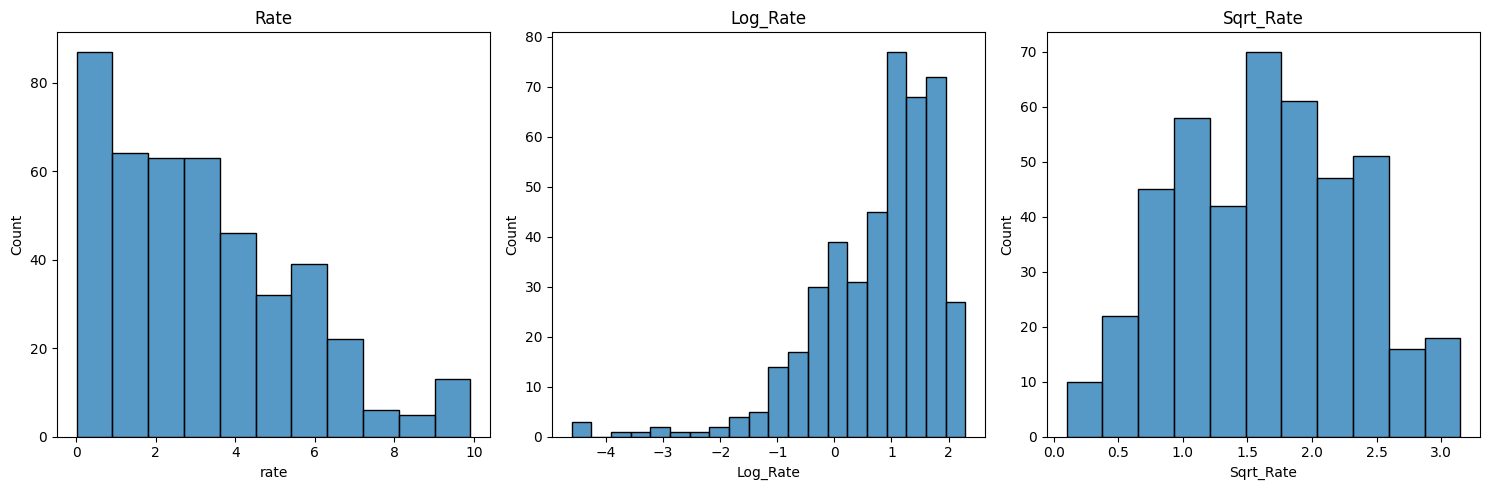

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(x=df['rate'], ax=axes[0])
sns.histplot(x=df['Log_Rate'], ax=axes[1])
sns.histplot(x=df['Sqrt_Rate'], ax=axes[2])
axes[0].set_title('Rate')
axes[1].set_title('Log_Rate')
axes[2].set_title('Sqrt_Rate')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Mean of rate : {df['rate'].mean()}")
print(f"Mean of Log_Rate : {df['Log_Rate'].mean()}")
print(f"Mean of Sqrt_Rate : {df['Sqrt_Rate'].mean()}")

Mean of rate : 3.161818181818182
Mean of Log_Rate : 0.7523321265428069
Mean of Sqrt_Rate : 1.6411938929056753


In [ ]:
count= df['rate'].between(-0.5, 0.5).sum()
print(f"Number of rate values between -0.5 and 0.5 : {count}")
print(f"{count/df.shape[0]:0.2f}")

Number of rate values between -0.5 and 0.5 : 40
0.09


In [ ]:
df = df.drop(columns=['rate', 'Log_Rate'])
df=df.rename(columns={'Sqrt_Rate': 'rate'})
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,13672.0,home,0,2002-04-16,2003-12-20,1.466288
1,9794.0,credit,0,2003-10-21,2005-07-17,1.118034
2,12734.0,home,1,2006-02-01,2007-07-05,0.824621
3,12518.0,cash,1,2010-12-08,2013-05-05,1.113553
4,14049.0,credit,1,2010-07-07,2012-05-21,1.769181


### Scaling the Numerical Features (Standardization and Normalization)

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,1.359338,home,0,2002-04-16,2003-12-20,-0.255589
1,0.430405,credit,0,2003-10-21,2005-07-17,-0.764490
2,1.134650,home,1,2006-02-01,2007-07-05,-1.193253
3,1.082909,cash,1,2010-12-08,2013-05-05,-0.771039
4,1.449644,credit,1,2010-07-07,2012-05-21,0.187026


In [ ]:
from scipy.stats import skew
print(f"Rate Skewness : {skew(df['rate'])}")
print(f"Loan Amount Skewness : {skew(df['loan_amount'])}")

Rate Skewness : -0.00491846581318291
Loan Amount Skewness : -0.04662800006628367


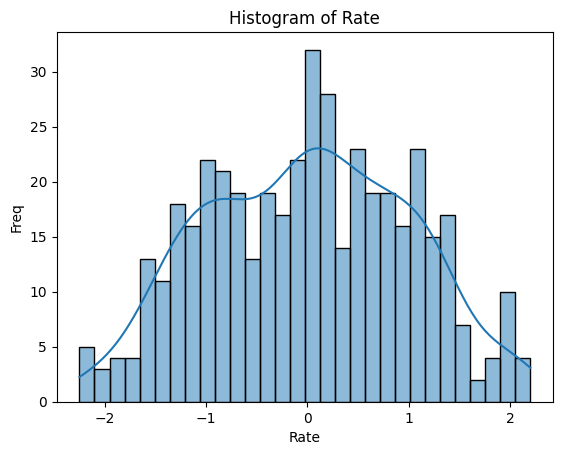

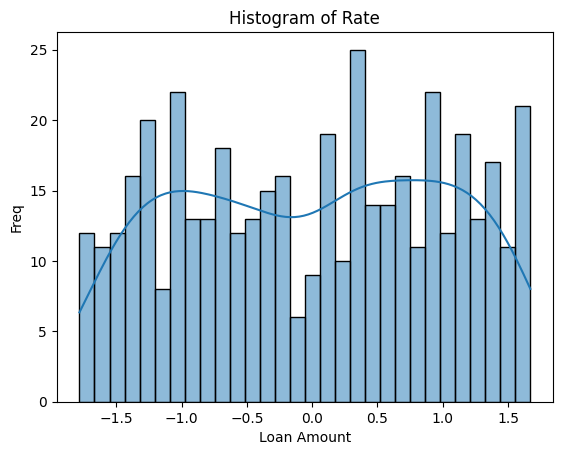

In [ ]:
sns.histplot(df['rate'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Rate')
plt.ylabel('Freq')
plt.show()


sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Histogram of Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Freq')
plt.show()


#### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,loan_amount,loan_type,repaid,loan_start,loan_end,rate
0,0.909867,home,0,2002-04-16,2003-12-20,0.448255
1,0.640785,credit,0,2003-10-21,2005-07-17,0.333999
2,0.844782,home,1,2006-02-01,2007-07-05,0.237735
3,0.829795,cash,1,2010-12-08,2013-05-05,0.332529
4,0.936026,credit,1,2010-07-07,2012-05-21,0.547629


In [ ]:
df.dtypes

loan_amount           float64
loan_type              object
repaid                 object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### Encoding Categorical Features

#### Use get_dumies

In [ ]:
df_dummies = pd.get_dummies(df, columns=['loan_type'], prefix='LT', drop_first=False)
df_dummies.head()

,loan_amount,repaid,loan_start,loan_end,rate,LT_cash,LT_credit,LT_home,LT_other
0,0.909867,0,2002-04-16,2003-12-20,0.448255,False,False,True,False
1,0.640785,0,2003-10-21,2005-07-17,0.333999,False,True,False,False
2,0.844782,1,2006-02-01,2007-07-05,0.237735,False,False,True,False
3,0.829795,1,2010-12-08,2013-05-05,0.332529,True,False,False,False
4,0.936026,1,2010-07-07,2012-05-21,0.547629,False,True,False,False


#### Use OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_features = encoder.fit_transform(df[['loan_type']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['loan_type']))
df_onehot = pd.concat([df.drop('loan_type', axis=1), encoded_df], axis=1)
df_onehot

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.909867,0,2002-04-16,2003-12-20,0.448255,0.0,0.0,1.0,0.0
1,0.640785,0,2003-10-21,2005-07-17,0.333999,0.0,1.0,0.0,0.0
2,0.844782,1,2006-02-01,2007-07-05,0.237735,0.0,0.0,1.0,0.0
3,0.829795,1,2010-12-08,2013-05-05,0.332529,1.0,0.0,0.0,0.0
4,0.936026,1,2010-07-07,2012-05-21,0.547629,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
441,0.252429,0,2003-10-16,2005-07-10,0.663160,NaN,NaN,NaN,NaN
442,0.213988,0,2010-03-24,2011-12-22,0.085484,NaN,NaN,NaN,NaN
41,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0
195,NaN,NaN,NaT,NaT,NaN,0.0,0.0,0.0,1.0


#### Use LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name='loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df = df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df_label

,loan_amount,repaid,loan_start,loan_end,rate,loan_type_encoded
0,0.909867,0,2002-04-16,2003-12-20,0.448255,2
1,0.640785,0,2003-10-21,2005-07-17,0.333999,1
2,0.844782,1,2006-02-01,2007-07-05,0.237735,2
3,0.829795,1,2010-12-08,2013-05-05,0.332529,0
4,0.936026,1,2010-07-07,2012-05-21,0.547629,1
...,...,...,...,...,...,...
435,0.860672,0,2001-11-26,2004-06-11,0.481769,3
436,0.081113,1,2004-01-27,2005-06-21,0.720353,1
437,0.608521,0,2001-12-17,2004-07-22,0.747035,3
438,0.252429,0,2003-10-16,2005-07-10,0.663160,2


In [ ]:
df.dtypes

In [ ]:
df=df_label
df

### Creating new Derived Features

In [ ]:
df_loans=df
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']
df_loans

,loan_amount,loan_type,repaid,loan_start,loan_end,rate,loan_tenure
0,0.909867,home,0,2002-04-16,2003-12-20,0.448255,613 days
1,0.640785,credit,0,2003-10-21,2005-07-17,0.333999,635 days
2,0.844782,home,1,2006-02-01,2007-07-05,0.237735,519 days
3,0.829795,cash,1,2010-12-08,2013-05-05,0.332529,879 days
4,0.936026,credit,1,2010-07-07,2012-05-21,0.547629,684 days
...,...,...,...,...,...,...,...
435,0.860672,other,0,2001-11-26,2004-06-11,0.481769,928 days
436,0.081113,credit,1,2004-01-27,2005-06-21,0.720353,511 days
437,0.608521,other,0,2001-12-17,2004-07-22,0.747035,948 days
438,0.252429,home,0,2003-10-16,2005-07-10,0.663160,633 days


In [ ]:
df_loans.dtypes

loan_amount            float64
loan_type               object
repaid                  object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

In [ ]:
import datetime as dt
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days / 365
df_loans=df_loans.drop(['loan_start','loan_end'],axis=1)
df_loans

,loan_amount,loan_type,repaid,rate,loan_tenure
0,0.909867,home,0,0.448255,1.679452
1,0.640785,credit,0,0.333999,1.739726
2,0.844782,home,1,0.237735,1.421918
3,0.829795,cash,1,0.332529,2.408219
4,0.936026,credit,1,0.547629,1.873973
...,...,...,...,...,...
435,0.860672,other,0,0.481769,2.542466
436,0.081113,credit,1,0.720353,1.400000
437,0.608521,other,0,0.747035,2.597260
438,0.252429,home,0,0.663160,1.734247


### Divide the data into training and test data

In [ ]:
df=df_loans
df.head()

,loan_amount,loan_type,repaid,rate,loan_tenure
0,0.909867,home,0,0.448255,1.679452
1,0.640785,credit,0,0.333999,1.739726
2,0.844782,home,1,0.237735,1.421918
3,0.829795,cash,1,0.332529,2.408219
4,0.936026,credit,1,0.547629,1.873973


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_series = pd.Series(label_encoder.fit_transform(df['loan_type']), name='loan_type_encoded')
encoded_series=encoded_series.reset_index(drop=True)
df = df.reset_index(drop=True)
df_label = pd.concat([df.drop('loan_type', axis=1), encoded_series], axis=1)
df=df_label
df.head()

,loan_amount,repaid,rate,loan_tenure,loan_type_encoded
0,0.909867,0,0.448255,1.679452,2
1,0.640785,0,0.333999,1.739726,1
2,0.844782,1,0.237735,1.421918,2
3,0.829795,1,0.332529,2.408219,0
4,0.936026,1,0.547629,1.873973,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_amount', axis=1)
y = df['loan_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8, random_state =0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((352, 4), (88, 4), (352,), (88,))

### Regression Models

#### Single Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_single = X_train[['rate']]
X_test_single = X_test[['rate']]

slr_model = LinearRegression()
slr_model.fit(X_train_single, y_train)

y_pred_single = slr_model.predict(X_test_single)

mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

print(f"MSE: {mse_single}")
print(f"R2: {r2_single}")

#### Multiple Linear Regression

In [ ]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred_multi = mlr_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MSE: {mse_multi}")
print(f"R2: {r2_multi}")

#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {2}) - MSE: {mse_poly}, R2: {r2_poly}")